<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-does-a-convolution?" data-toc-modified-id="What-does-a-convolution?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What does a convolution?</a></span></li><li><span><a href="#Are-all-libraries-that-are-needed-available?" data-toc-modified-id="Are-all-libraries-that-are-needed-available?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Are all libraries that are needed available?</a></span></li><li><span><a href="#Load-an-example-image-and-display-it" data-toc-modified-id="Load-an-example-image-and-display-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load an example image and display it</a></span></li><li><span><a href="#Building-a-small-Keras-model-with-a-single-CONV-layer" data-toc-modified-id="Building-a-small-Keras-model-with-a-single-CONV-layer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building a small Keras model with a single CONV layer</a></span></li><li><span><a href="#Get-and-show-the-random-initialized-weights" data-toc-modified-id="Get-and-show-the-random-initialized-weights-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get and show the random initialized weights</a></span></li><li><span><a href="#Setting-custom-filter-weights" data-toc-modified-id="Setting-custom-filter-weights-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setting custom filter weights</a></span></li><li><span><a href="#Filtering-the-image-with-the-custom-filters" data-toc-modified-id="Filtering-the-image-with-the-custom-filters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Filtering the image with the custom filters</a></span></li><li><span><a href="#Horizontal-line-detector" data-toc-modified-id="Horizontal-line-detector-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Horizontal line detector</a></span></li></ul></div>

# What does a convolution?

This notebook shall help to answer this question.

# Are all libraries that are needed available?

In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import matplotlib.pyplot as plt

print( "Your NumPy version is: " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)
print( "Your Keras version is: " + keras.__version__ )
print( "Your OpenCV version is: " + cv2.__version__ )

Using TensorFlow backend.


Your NumPy version is: 1.16.2
Your TensorFlow version is: 1.13.1
Your Keras version is: 2.1.6
Your OpenCV version is: 4.1.0


# Load an example image and display it

image has shape (800, 800, 3)
image has now shape (800, 800)


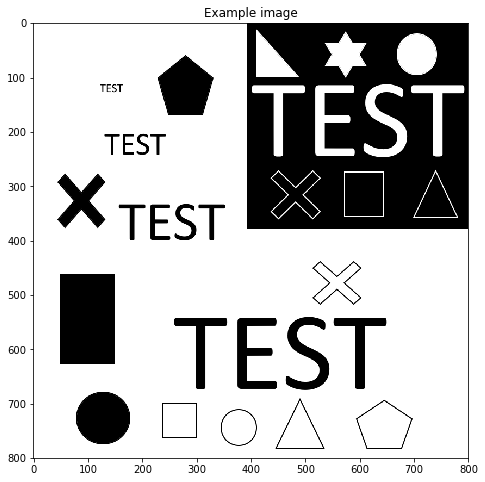

In [2]:
IMG_SIZE = (800,800)

filename = "data/filter_test.png"

# ",0" means: read the image as a gray-scale image
image = cv2.imread(filename)
print("image has shape", image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("image has now shape", image.shape)
image = cv2.resize(image, IMG_SIZE)
image = image * (1.0 / 255.0)

# define figure size
pixel_size_in_inchs = 0.01
fig_height = int(IMG_SIZE[0] * pixel_size_in_inchs)
fig_width  = int(IMG_SIZE[1] * pixel_size_in_inchs)
plt.figure(figsize=(fig_height,fig_width))

# display the image as a gray-scale image
plt.imshow(image, cmap='gray')
plt.title("Example image")
plt.show()

# Building a small Keras model with a single CONV layer

In [3]:
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.layers.convolutional import Conv2D

NR_IMG_CHANNELS = 1
HYPPARAM_NR_FILTER = 2
HYPPARAM_KERNEL_SIDE_LEN=5
HYPPARAM_KERNEL_STRIDE = 1
HYPPARAM_WITH_BIAS = True
THE_INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], NR_IMG_CHANNELS)

K.clear_session()

model = Sequential()

model.add(Conv2D(HYPPARAM_NR_FILTER,
                 kernel_size=(HYPPARAM_KERNEL_SIDE_LEN,
                              HYPPARAM_KERNEL_SIDE_LEN),
                 strides=(HYPPARAM_KERNEL_STRIDE,
                          HYPPARAM_KERNEL_STRIDE),
                 activation='linear',
                 input_shape=THE_INPUT_SHAPE,
                 use_bias=HYPPARAM_WITH_BIAS))

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 796, 796, 2)       52        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


# Get and show the random initialized weights

In [4]:
# model:
# layer -> layer -> layer -> ...
#   |        |        |
#   v        v        v
# weights  weights  weights
#   |
#   list: [filter weights, bias weights]
#                |              |
#                v              v
#            4D Array!      1D Array
#     of shape (height, width, channels, filter-nr)
#

print("\n1.) LEVEL: MODEL LAYERS")
# 1.1 How many layers does this model have?
print("The model has {} layer(s).".
      format( len(model.layers) ) )

# 1.2 What is the data type in which the layers are stored?
print("The model.layers data structure has data type",
      type(model.layers) )

# 1.3 Get the first layer (the CONV layer)
layer1 = model.layers[0]
print("The first layer has data type", type(layer1))


print("\n2.) LEVEL: WEIGHT LISTS")
# 2.1 Get the weights of all filters in the first CONV layer
weights_layer1 = layer1.get_weights()
print("weights_layer1 has data type", type(weights_layer1))

# 2.2 How long is the list of weights?
print("\nThere are {} elements stored in the weights list".
      format(len(weights_layer1)))
print("Reason:")
print(" -> 1st element is filter weights")
print(" -> 2nd element is bias weights")

# 2.3 Get both the filter weights from the weights list
filter_weights = weights_layer1[0]
print("\nfilter_weights has type", type(filter_weights))
print("filter_weights has shape", filter_weights.shape)

# 2.4 Get both the bias weights from the weights list
#     However, there are only bias weights if we
#     activated them before with "use_bias = True"
if HYPPARAM_WITH_BIAS:
    bias_weights = weights_layer1[1]
    print("bias_weights has type", type(bias_weights))
    print("bias_weights has shape", bias_weights.shape)
    print("Here are all the bias weights:", bias_weights)



print("\n3.) LEVEL: INDIVIDUAL FILTER WEIGHTS")
# 3.1 Get individual filter weights
filter0_weights = filter_weights[:,:,:,0]
filter1_weights = filter_weights[:,:,:,1]
print("filter0_weights has shape", filter0_weights.shape)
print("Here are the {}x{}x{} weights of filter0:".
      format(HYPPARAM_KERNEL_SIDE_LEN,
             HYPPARAM_KERNEL_SIDE_LEN,
             NR_IMG_CHANNELS),
             filter0_weights)




1.) LEVEL: MODEL LAYERS
The model has 1 layer(s).
The model.layers data structure has data type <class 'list'>
The first layer has data type <class 'keras.layers.convolutional.Conv2D'>

2.) LEVEL: WEIGHT LISTS
weights_layer1 has data type <class 'list'>

There are 2 elements stored in the weights list
Reason:
 -> 1st element is filter weights
 -> 2nd element is bias weights

filter_weights has type <class 'numpy.ndarray'>
filter_weights has shape (5, 5, 1, 2)
bias_weights has type <class 'numpy.ndarray'>
bias_weights has shape (2,)
Here are all the bias weights: [0. 0.]

3.) LEVEL: INDIVIDUAL FILTER WEIGHTS
filter0_weights has shape (5, 5, 1)
Here are the 5x5x1 weights of filter0: [[[-0.24589106]
  [-0.16603944]
  [ 0.18828139]
  [ 0.18224245]
  [-0.12601234]]

 [[-0.24921298]
  [-0.18384705]
  [ 0.21433952]
  [-0.22969899]
  [ 0.13841829]]

 [[-0.0587465 ]
  [-0.03182963]
  [-0.15144368]
  [-0.2022678 ]
  [-0.1549317 ]]

 [[-0.0601211 ]
  [-0.04107605]
  [-0.19176838]
  [ 0.2340785 ]

# Setting custom filter weights

Let's see whether you can predict what the following filter will do!

In [5]:
for slice in range(0,2):
    filter0_weights [slice,:,:] = +1.0/10.0
filter0_weights [2,:,:] = +0.0
for slice in range(3,5):
    filter0_weights [slice,:,:] = -1.0/10.0

print(filter0_weights)

[[[ 0.1]
  [ 0.1]
  [ 0.1]
  [ 0.1]
  [ 0.1]]

 [[ 0.1]
  [ 0.1]
  [ 0.1]
  [ 0.1]
  [ 0.1]]

 [[ 0. ]
  [ 0. ]
  [ 0. ]
  [ 0. ]
  [ 0. ]]

 [[-0.1]
  [-0.1]
  [-0.1]
  [-0.1]
  [-0.1]]

 [[-0.1]
  [-0.1]
  [-0.1]
  [-0.1]
  [-0.1]]]


Now set these manually generated filter weights as filter weights for the first filter of the model.

In [6]:
print("Weights before:")
print( model.layers[0].get_weights() )

filter_weights = model.layers[0].get_weights()[0]
bias_weights = model.layers[0].get_weights()[1]
new_weights = [filter_weights, bias_weights]

# set weights for filter 0
filter_weights[:,:,:,0] = filter0_weights
model.layers[0].set_weights( new_weights )

print("Weights after:")
print( model.layers[0].get_weights() )

Weights before:
[array([[[[-0.24589106,  0.14617795]],

        [[-0.16603944,  0.02809137]],

        [[ 0.18828139, -0.02272889]],

        [[ 0.18224245, -0.27939248]],

        [[-0.12601234, -0.22604051]]],


       [[[-0.24921298,  0.15054396]],

        [[-0.18384705, -0.02985048]],

        [[ 0.21433952, -0.00828755]],

        [[-0.22969899, -0.13911623]],

        [[ 0.13841829,  0.03208372]]],


       [[[-0.0587465 , -0.11054681]],

        [[-0.03182963,  0.11914456]],

        [[-0.15144368, -0.16819116]],

        [[-0.2022678 ,  0.12852886]],

        [[-0.1549317 , -0.11539356]]],


       [[[-0.0601211 , -0.22253652]],

        [[-0.04107605, -0.09849618]],

        [[-0.19176838, -0.06104515]],

        [[ 0.2340785 ,  0.0671671 ]],

        [[ 0.06344822, -0.1629642 ]]],


       [[[-0.04867861, -0.00883654]],

        [[ 0.09798273,  0.02099034]],

        [[-0.00147286,  0.1170679 ]],

        [[-0.22576861, -0.21815945]],

        [[-0.08283684,  0.2797748 ]]]],

# Filtering the image with the custom filters

filter_result has shape (1, 796, 796, 2)


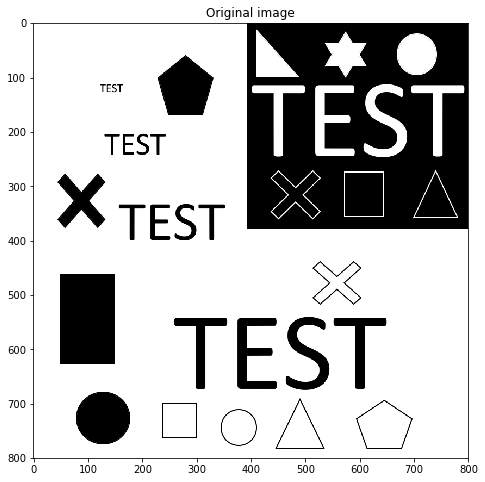

Min/Max value in orginal image is 0.0/1.0


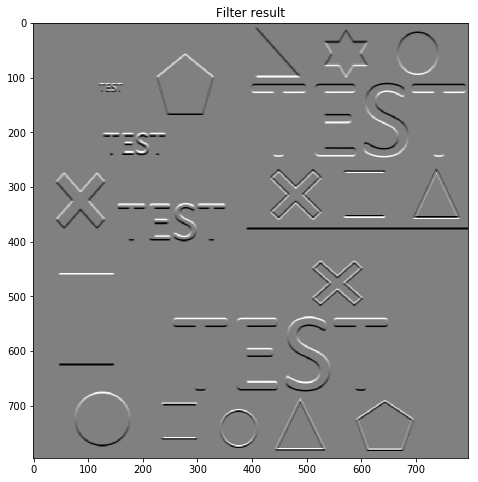

Min/Max value in feature_map1 is -1.0/1.0


In [7]:
# 1.
# Prepare input for the CNN, since
# input for the model has to be 4-dimensional
nr_images = 1
nr_channels = 1
input_for_conv_net = image.reshape(nr_images,
                                   image.shape[0],
                                   image.shape[1],
                                   nr_channels)

# 2.
# Filter image!
filter_result = model.predict(input_for_conv_net)

# 3.
# Show the shape of the resulting output tensor
print("filter_result has shape", filter_result.shape)

# 4.
# Visualize filter results
tensor_height = filter_result.shape[1]
tensor_width  = filter_result.shape[2]
feature_map1 = filter_result[:,:,:,0].reshape((tensor_height,tensor_width))

plt.figure(figsize=(fig_height,fig_width))
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.show()
print("Min/Max value in orginal image is {}/{}".
      format(np.amin(image), np.amax(image)) )

plt.figure(figsize=(fig_height,fig_width))
plt.imshow(feature_map1, cmap='gray')
plt.title("Filter result")
plt.show()
print("Min/Max value in feature_map1 is {}/{}".
      format(np.amin(feature_map1), np.amax(feature_map1)) )

# Horizontal line detector

Now the filter responses are strongly positive (+1.0) from white areas to black areas and strongly negative (-1.0) from black areas to white areas. So we see strong (positive or negative) responses wherever there is a horizontal line.

But how can we detect horizontal lines independently from these two cases? Well, we could simply detect the "strongness" of the filter responses - independently from the sign of the filter response value!


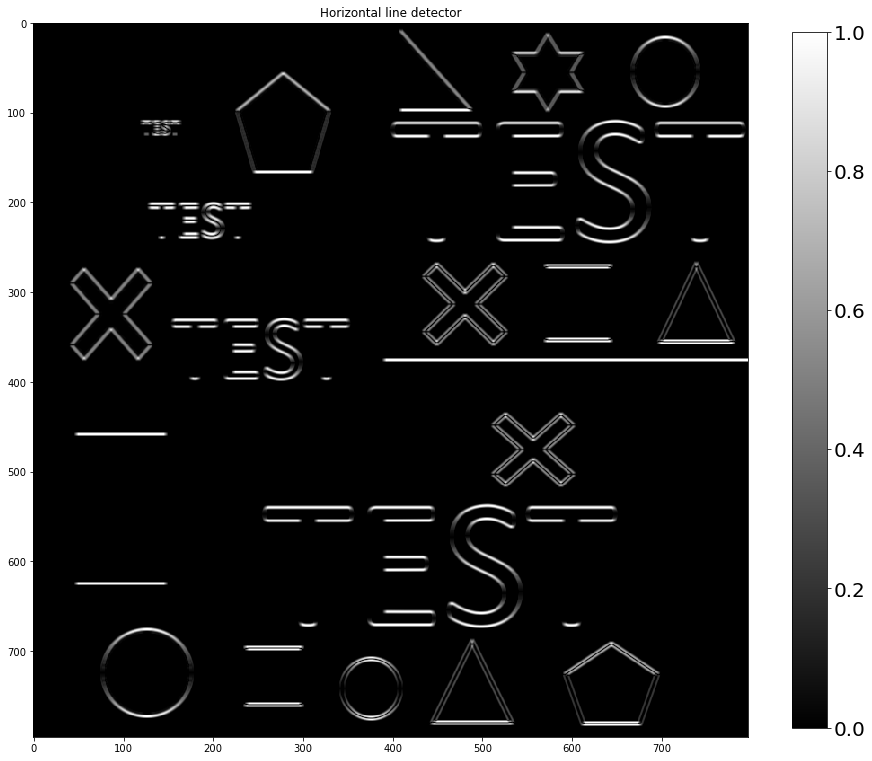

In [14]:
horizontal_lines = abs(feature_map1)

# define figure size
pixel_size_in_inchs = 0.02
fig_height = int(IMG_SIZE[0] * pixel_size_in_inchs)
fig_width  = int(IMG_SIZE[1] * pixel_size_in_inchs)
plt.figure(figsize=(fig_height,fig_width))

plt.figure(figsize=(fig_height,fig_width))
plt.imshow(horizontal_lines, cmap='gray')
plt.title("Horizontal line detector")

cb = plt.colorbar(shrink=0.8)
cb.ax.tick_params(labelsize=20)

plt.show()